In [12]:
# Importando biblioteca
import pandas as pd

# Importando tabelas
cadastros_clientes_df = pd.read_csv('CadastroClientes.csv', sep = ';')
cadastros_funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep = ';', decimal = ',')
servicos_df = pd.read_csv('BaseServiçosPrestados.xlsx - Plan1.csv')

# Removendo algumas colunas
cadastros_clientes_df = cadastros_clientes_df.drop(['Cliente'], axis = 1)
cadastros_funcionarios_df = cadastros_funcionarios_df.drop(['Estado Civil', 'Nome Completo', 'Cargo'], axis = 1)
servicos_df = servicos_df.drop(['Codigo do Servico'], axis = 1)

# Mesclando todas as tabelas em uma nova
cadastros_servicos = servicos_df
cadastros_servicos = cadastros_servicos.merge(cadastros_clientes_df, on = 'ID Cliente')
cadastros_servicos = cadastros_servicos.merge(cadastros_funcionarios_df, on = 'ID Funcionário')

# Mostrando todas as tabelas
print(cadastros_servicos)
print('-'*100)
print(servicos_df)
print('-'*100)
print(cadastros_clientes_df)
print('-'*100)
print(cadastros_funcionarios_df)


     ID Funcionário  ID Cliente  Tempo Total de Contrato (Meses)  \
0                67           1                               14   
1                67          78                                6   
2                67         125                                8   
3                67         175                                6   
4                17           2                               12   
..              ...         ...                              ...   
232              25         304                               14   
233              79         308                               10   
234              99         309                                8   
235              14         310                               12   
236              72         317                                6   

     Valor Contrato Mensal  Salario Base  Impostos  Beneficios   VT      VR  \
0                      540         12054    6027.0      2410.8  308  829.92   
1                     171

In [2]:
# Calculando o a soma de todos os salários
salario_total = cadastros_servicos['Salario Base'].sum()
print(f'A soma do salário de todos os funcionários da empresa é R${salario_total:,}')


A soma do salário de todos os funcionários da empresa é R$3,183,152


In [3]:
# Calculando o faturamento total
faturamento_total = 0
for i, valor in enumerate(cadastros_servicos['Valor Contrato Mensal']):
    faturamento_servico = cadastros_servicos['Tempo Total de Contrato (Meses)'][i] * valor
    faturamento_total += faturamento_servico

print(f'O faturamento total da empresa foi de R${faturamento_total:.2f}')


O faturamento total da empresa foi de R$5519160.00


In [5]:
# Calculando a porcentagem de funcionários que realizaram algum contrato
funcionarios1 = len(cadastros_funcionarios_df['ID Funcionário'])
funcionarios2 = len(servicos_df['ID Funcionário'].unique())
funcionarios_contrato = funcionarios2 / funcionarios1
print(f'{funcionarios_contrato:.2%} dos funcionários realizaram algum contrato.')


86.84% dos funcionários realizaram algum contrato.


In [26]:
# Calculando o número de contratos por área
total_areas = []

# Verificando todas as áreas
for area in cadastros_servicos['Area']:
    
    if not area in total_areas:
        total_areas.append(area)
        
print(f'Áreas de serviços: {total_areas}')

# Verificando todos os contratos na respectiva área
for area in (total_areas):
    contratos_area = cadastros_servicos[cadastros_servicos['Area'] == area]
    print(f'O número de contratos na área {area} é de {len(contratos_area)}')
    

Áreas de serviços: ['Financeiro', 'Logística', 'Comercial', 'Administrativo', 'Operações']
O número de contratos na área Financeiro é de 42
O número de contratos na área Logística é de 40
O número de contratos na área Comercial é de 44
O número de contratos na área Administrativo é de 63
O número de contratos na área Operações é de 48


     ID Funcionário            Area
0                67      Financeiro
1                67      Financeiro
2                67      Financeiro
3                67      Financeiro
4                17       Logística
..              ...             ...
232              25  Administrativo
233              79       Operações
234              99  Administrativo
235              14      Financeiro
236              72       Logística

[237 rows x 2 columns]
AxesSubplot(0.125,0.11;0.775x0.77)


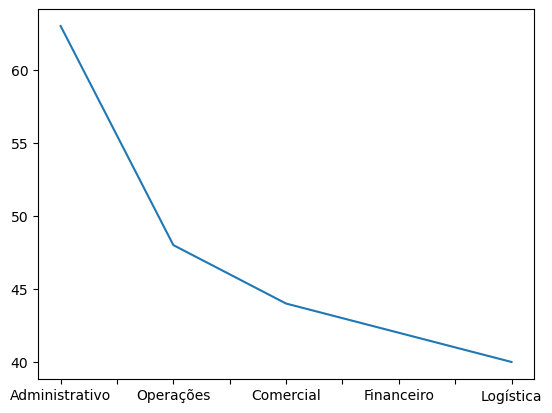

In [27]:
# Calculando o número de contratos por área
# Criando um DataFrame com as vezes que funcionários fizeram algum contrato 
contratos_area_df = servicos_df[['ID Funcionário']].merge(cadastros_funcionarios_df[['ID Funcionário', 'Area']], on = 'ID Funcionário')

# Contando a quantidade de valores únicos
contratos_area = contratos_area_df['Area'].value_counts()

# Mostrando as informações
print(contratos_area_df)
print(contratos_area.plot(kind = 'line'))


<AxesSubplot:>

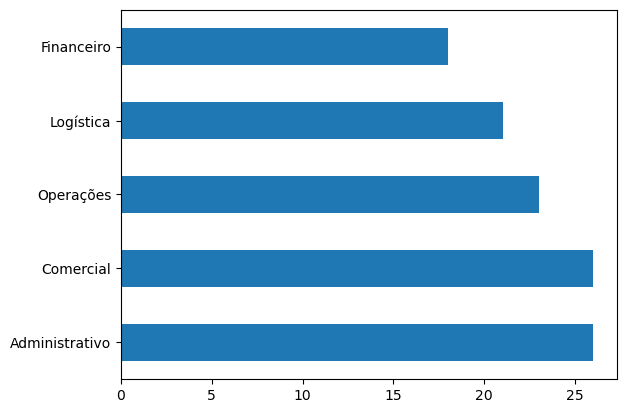

In [8]:
# Calcular quantos funcionários em cada área
funcionarios_area = cadastros_funcionarios_df['Area'].value_counts()
display(funcionarios_area.plot(kind = 'barh'))


In [9]:
# Calculando a média do faturamento mensal
faturamento_mensal_medio = cadastros_clientes_df['Valor Contrato Mensal'].mean()
print(f'O faturamento mensal médio é de R${faturamento_mensal_medio:,.2f}')

O faturamento mensal médio é de R$2,502.56
